In [1]:
import pickle

import pandas as pd
import matplotlib.pyplot as plt

# Обработка ga_hits

In [2]:
with open('data/ga_hits.pkl', 'rb') as file:
    df_ga_hits = pickle.load(file)
df_ga_hits.head()

,session_id,hit_date,hit_time,hit_number,hit_type,hit_referer,hit_page_path,event_category,event_action,event_label,event_value
0,5639623078712724064.1640254056.1640254056,2021-12-23,597864.0,30,event,NaN,sberauto.com/cars?utm_source_initial=google&ut...,quiz,quiz_show,NaN,None
1,7750352294969115059.1640271109.1640271109,2021-12-23,597331.0,41,event,NaN,sberauto.com/cars/fiat?city=1&city=18&rental_c...,quiz,quiz_show,NaN,None
2,885342191847998240.1640235807.1640235807,2021-12-23,796252.0,49,event,NaN,sberauto.com/cars/all/volkswagen/polo/e994838f...,quiz,quiz_show,NaN,None
3,142526202120934167.1640211014.1640211014,2021-12-23,934292.0,46,event,NaN,sberauto.com/cars?utm_source_initial=yandex&ut...,quiz,quiz_show,NaN,None
4,3450086108837475701.1640265078.1640265078,2021-12-23,768741.0,79,event,NaN,sberauto.com/cars/all/mercedes-benz/cla-klasse...,quiz,quiz_show,NaN,None


In [3]:
#df_ga_hits = pd.read_csv('data/ga_hits.csv')
#df_ga_hits.head()

In [4]:
print('Количество уникальных session_id:', df_ga_hits.session_id.nunique())
pd.set_option("display.float_format" ,'{:,.2f}'.format)
pd.set_option('max_colwidth', 100)
df_ga_hits.describe(include='all')

Количество уникальных session_id: 1734610


,session_id,hit_date,hit_time,hit_number,hit_type,hit_referer,hit_page_path,event_category,event_action,event_label,event_value
count,15726470,15726470,"6,566,148.00","15,726,470.00",15726470,9451666,15726470,15726470,15726470,11966286,0
unique,1734610,226,NaN,NaN,1,37873,342715,52,230,39825,0
top,5442565791571325612.1632449195.1632449195,2021-05-24,NaN,NaN,event,HbolMJUevblAbkHClEQa,podpiska.sberauto.com/,card_web,view_card,KclpemfoHstknWHFiLit,NaN
freq,768,513035,NaN,NaN,15726470,8879187,2793639,7456998,3558985,6505447,NaN
mean,NaN,NaN,"209,104.99",23.57,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,"403,210.97",28.88,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,0.00,1.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,"24,120.00",7.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,"89,941.00",15.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,"219,535.25",29.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# Удаляем дубликаты
df_ga_hits = df_ga_hits.drop_duplicates()

In [6]:
df_ga_hits.hit_type.value_counts(dropna=False)

event    15726470
Name: hit_type, dtype: int64

In [7]:
# hit_type содержит только значение event - неинформативно, убираем
df_ga_hits.drop(['hit_type'], axis=1, inplace=True)

In [8]:
df_ga_hits.event_value.value_counts(dropna=False)

NaN    15726470
Name: event_value, dtype: int64

In [9]:
# event_value содержит только значение NaN - неинформативно, убираем
df_ga_hits.drop(['event_value'], axis=1, inplace=True)

In [10]:
# event_label - тэг действия (event_action) - неинформативно, убираем
df_ga_hits.drop(['event_label'], axis=1, inplace=True)

In [11]:
# Выделяем марку и модель автомобиля из hit_page_path
df_ga_hits['car_brand'] = df_ga_hits['hit_page_path'].apply(
    lambda x: str(x)[str(x).find('/cars/all/') + len('/cars/all/'):].split('/')[0] 
    if str(x).find('/cars/all/') > -1 else 'Undefined')

df_ga_hits['car_model'] = df_ga_hits['hit_page_path'].apply(
    lambda x: str(x)[str(x).find('/cars/all/') + len('/cars/all/'):].split('/')[1] 
    if str(x).find('/cars/all/') > -1 else 'Undefined')

df_ga_hits.drop(['hit_page_path'], axis=1, inplace=True)

In [12]:
df_ga_hits.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15726470 entries, 0 to 15726469
Data columns (total 9 columns):
 #   Column          Dtype  
---  ------          -----  
 0   session_id      object 
 1   hit_date        object 
 2   hit_time        float64
 3   hit_number      int64  
 4   hit_referer     object 
 5   event_category  object 
 6   event_action    object 
 7   car_brand       object 
 8   car_model       object 
dtypes: float64(1), int64(1), object(7)
memory usage: 1.2+ GB


In [13]:
df_ga_hits.isnull().sum().sort_values()

session_id              0
hit_date                0
hit_number              0
event_category          0
event_action            0
car_brand               0
car_model               0
hit_referer       6274804
hit_time          9160322
dtype: int64

In [14]:
# Заполнение незаполненных строк hit_referer значением 'Undefined'
df_ga_hits.hit_referer = df_ga_hits.hit_referer.fillna('Undefined')

In [15]:
df_ga_hits.hit_referer.describe(include='all')

count                 15726470
unique                   37874
top       HbolMJUevblAbkHClEQa
freq                   8879187
Name: hit_referer, dtype: object

In [16]:
df_ga_hits.hit_referer.value_counts(dropna=False).head(10)

HbolMJUevblAbkHClEQa    8879187
Undefined               6274804
FwdMTcXzWAwhtsnMAbhS      91940
sAGDBCdeVPmQPwkVEcIX      53565
GQmOLxANuSeCxCanBpMl      35470
ZeRnFrHdnMmnqraghdGJ      23016
CENJYQocGncDfpQMoNnT      16787
NfSAiKHBqffzsXrbjcSr      14949
trXmoxcphNjuYcShOXwL      10325
eAbATQERmGPolIKkWXkU       8231
Name: hit_referer, dtype: int64

In [17]:
# "Укрупним" колонку hit_referer
hit_referers = ['HbolMJUevblAbkHClEQa', 
                'Undefined', 
                'FwdMTcXzWAwhtsnMAbhS',
                'sAGDBCdeVPmQPwkVEcIX',
                'GQmOLxANuSeCxCanBpMl',
                'ZeRnFrHdnMmnqraghdGJ',
                'CENJYQocGncDfpQMoNnT',
                'NfSAiKHBqffzsXrbjcSr']
df_ga_hits.hit_referer = df_ga_hits.hit_referer.apply(lambda x: x if x in hit_referers else 'Other')
df_ga_hits.hit_referer.value_counts(dropna=False)

HbolMJUevblAbkHClEQa    8879187
Undefined               6274804
Other                    336752
FwdMTcXzWAwhtsnMAbhS      91940
sAGDBCdeVPmQPwkVEcIX      53565
GQmOLxANuSeCxCanBpMl      35470
ZeRnFrHdnMmnqraghdGJ      23016
CENJYQocGncDfpQMoNnT      16787
NfSAiKHBqffzsXrbjcSr      14949
Name: hit_referer, dtype: int64

In [18]:
# Заполнение незаполненных строк колонки hit_time средним значением по колонке
df_ga_hits.hit_time = df_ga_hits.hit_time.fillna(df_ga_hits.hit_time.mean())
df_ga_hits.hit_time.describe()

count   15,726,470.00
mean       209,104.99
std        260,538.57
min              0.00
25%        127,290.00
50%        209,104.99
75%        209,104.99
max     13,156,885.00
Name: hit_time, dtype: float64

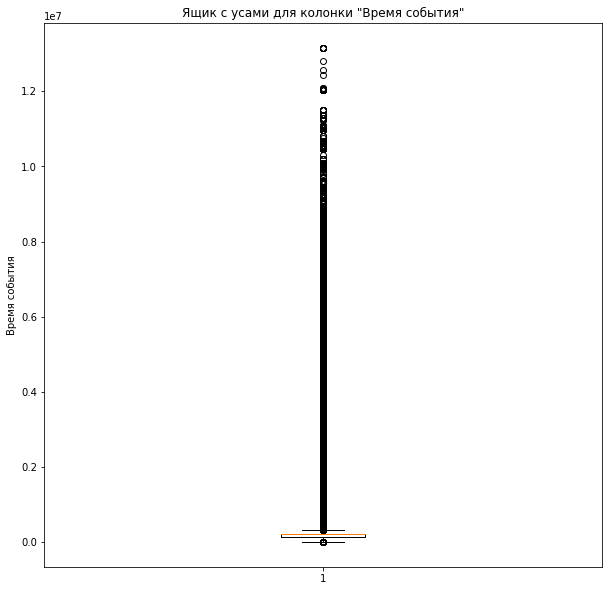

In [19]:
plt.figure(figsize=(10, 10))
plt.boxplot(df_ga_hits.hit_time)
plt.ylabel('Время события')
plt.title('Ящик с усами для колонки "Время события"');

In [20]:
def calculate_outliers(data):
    q25 = data.quantile(0.25)
    q75 = data.quantile(0.75)
    iqr = q75 - q25
    boundaries = (q25 - 1.5 * iqr, q75 + 1.5 * iqr)
    
    return boundaries

In [21]:
hit_time_boundaries = calculate_outliers(df_ga_hits.hit_time)
hit_time_boundaries

(4567.516193512565, 331827.4730108124)

In [22]:
df_ga_hits = df_ga_hits[(df_ga_hits.hit_time >= hit_time_boundaries[0]) & (df_ga_hits.hit_time <= hit_time_boundaries[1])]

count   13,621,731.00
mean       177,050.66
std         66,112.80
min          4,568.00
25%        169,454.00
50%        209,104.99
75%        209,104.99
max        331,827.00
Name: hit_time, dtype: float64

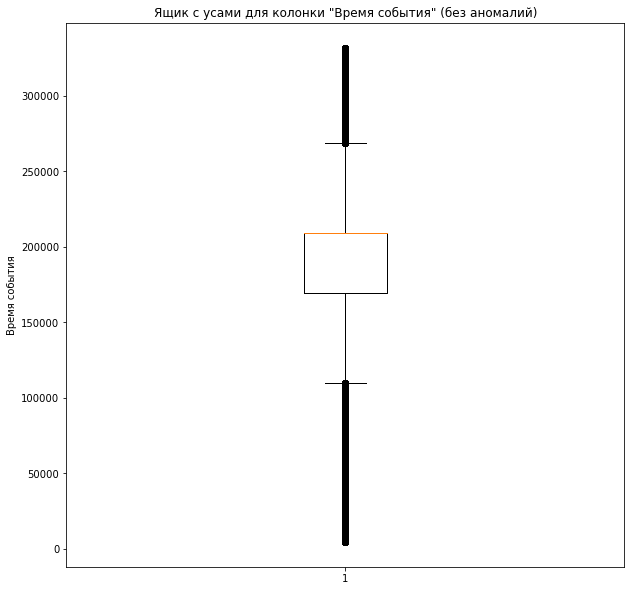

In [23]:
plt.figure(figsize=(10, 10))
plt.boxplot(df_ga_hits.hit_time)
plt.ylabel('Время события')
plt.title('Ящик с усами для колонки "Время события" (без аномалий)');
df_ga_hits.hit_time.describe()

count   13,621,731.00
mean            22.43
std             25.80
min              1.00
25%              8.00
50%             15.00
75%             28.00
max            500.00
Name: hit_number, dtype: float64

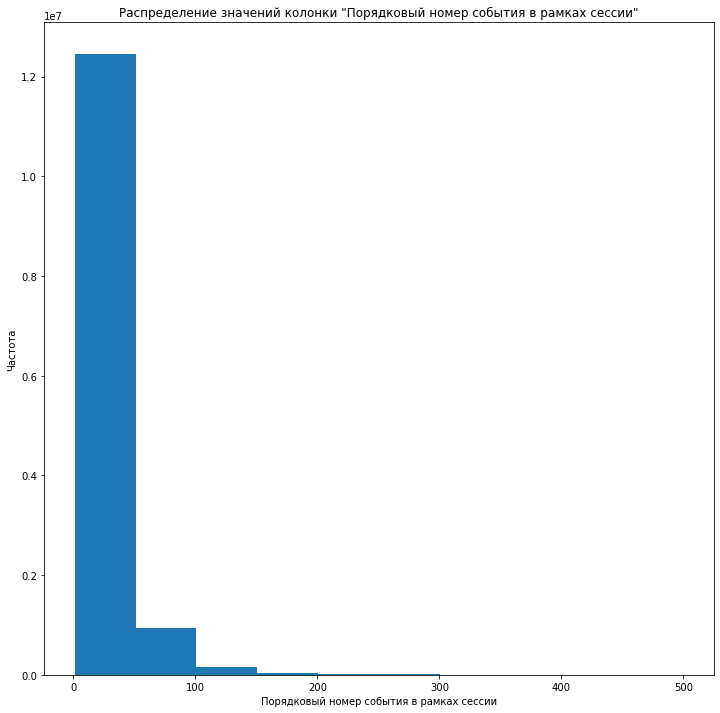

In [24]:
plt.figure(figsize=(12, 12))
plt.hist(df_ga_hits.hit_number)
plt.xlabel('Порядковый номер события в рамках сессии')
plt.ylabel('Частота')
plt.title('Распределение значений колонки "Порядковый номер события в рамках сессии"');
df_ga_hits.hit_number.describe()

In [25]:
hit_number_boundaries = calculate_outliers(df_ga_hits.hit_number)
hit_number_boundaries

(-22.0, 58.0)

In [26]:
df_ga_hits = df_ga_hits[
    (df_ga_hits.hit_number >= hit_number_boundaries[0]) & (df_ga_hits.hit_number <= hit_number_boundaries[1])]

In [27]:
# Сожмём колонки hit_time и hit_number
df_ga_hits.hit_time = df_ga_hits.hit_time.astype('float32')
df_ga_hits.hit_number = df_ga_hits.hit_number.astype('int32')

In [28]:
df_ga_hits.event_action.value_counts(dropna=False)

view_card              2899056
view_new_card          2886373
sub_landing            1186180
go_to_car_card          831685
sub_view_cars_click     707495
                        ...   
continue in social           1
sber_id_auth_error           1
rating_banner_show           1
click_sell_car               1
titul_page_view              1
Name: event_action, Length: 222, dtype: int64

In [29]:
# Преобразуем колонку event_action в target_action. Группируем по целевому действию "Оставить заявку" и "Заказать звонок"
event_actions = ['sub_car_claim_click', 
                 'sub_car_claim_submit_click',
                 'sub_open_dialog_click', 
                 'sub_custom_question_submit_click',
                 'sub_call_number_click', 
                 'sub_callback_submit_click', 
                 'sub_submit_success',
                 'sub_car_request_submit_click']
df_ga_hits['target_action'] = df_ga_hits['event_action'].apply(lambda x: 1 if x in event_actions else 0).astype('int32')
df_ga_hits.target_action

18          0
86          0
102         0
111         0
112         0
           ..
15726413    0
15726420    0
15726422    0
15726429    0
15726441    0
Name: target_action, Length: 12781343, dtype: int32

In [30]:
# Удалим колонку event_action
df_ga_hits.drop(['event_action'], axis=1, inplace=True)

In [31]:
df_ga_hits.target_action.value_counts(dropna=False)

0    12697703
1       83640
Name: target_action, dtype: int64

In [32]:
# Разбиваем колонку hit_date
df_ga_hits['hit_year'] = pd.to_datetime(df_ga_hits['hit_date']).dt.year.astype('int32')
df_ga_hits['hit_month'] = pd.to_datetime(df_ga_hits['hit_date']).dt.month.astype('int32')
df_ga_hits['hit_day'] = pd.to_datetime(df_ga_hits['hit_date']).dt.day.astype('int32')
df_ga_hits.drop(['hit_date'], axis=1, inplace=True)

In [33]:
df_ga_hits.hit_year.value_counts(dropna=False)

2021    12781343
Name: hit_year, dtype: int64

In [34]:
# hit_year содержит только значение 2021 - неинформативно, убираем
df_ga_hits.drop(['hit_year'], axis=1, inplace=True)

In [35]:
print('Количество уникальных session_id:', df_ga_hits.session_id.nunique())
df_ga_hits.describe(include='all')

Количество уникальных session_id: 1478396


,session_id,hit_time,hit_number,hit_referer,event_category,car_brand,car_model,target_action,hit_month,hit_day
count,12781343,"12,781,343.00","12,781,343.00",12781343,12781343,12781343,12781343,"12,781,343.00","12,781,343.00","12,781,343.00"
unique,1478396,NaN,NaN,9,50,21,72,NaN,NaN,NaN
top,6556325878862444653.1632368752.1632368752,NaN,NaN,HbolMJUevblAbkHClEQa,card_web,Undefined,Undefined,NaN,NaN,NaN
freq,107,NaN,NaN,8170975,6060745,10327973,10327973,NaN,NaN,NaN
mean,NaN,"186,600.31",17.62,NaN,NaN,NaN,NaN,0.01,8.94,17.21
std,NaN,"65,673.73",12.85,NaN,NaN,NaN,NaN,0.08,2.29,8.77
min,NaN,"4,568.00",1.00,NaN,NaN,NaN,NaN,0.00,5.00,1.00
25%,NaN,"153,431.00",8.00,NaN,NaN,NaN,NaN,0.00,7.00,10.00
50%,NaN,"209,104.98",14.00,NaN,NaN,NaN,NaN,0.00,9.00,18.00
75%,NaN,"209,104.98",24.00,NaN,NaN,NaN,NaN,0.00,11.00,25.00


In [36]:
df_ga_hits.isnull().sum().sort_values()

session_id        0
hit_time          0
hit_number        0
hit_referer       0
event_category    0
car_brand         0
car_model         0
target_action     0
hit_month         0
hit_day           0
dtype: int64

In [37]:
df_ga_hits.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12781343 entries, 18 to 15726441
Data columns (total 10 columns):
 #   Column          Dtype  
---  ------          -----  
 0   session_id      object 
 1   hit_time        float32
 2   hit_number      int32  
 3   hit_referer     object 
 4   event_category  object 
 5   car_brand       object 
 6   car_model       object 
 7   target_action   int32  
 8   hit_month       int32  
 9   hit_day         int32  
dtypes: float32(1), int32(4), object(5)
memory usage: 828.9+ MB


In [38]:
df_ga_hits.sort_values(by='session_id').head(25)

,session_id,hit_time,hit_number,hit_referer,event_category,car_brand,car_model,target_action,hit_month,hit_day
11348803,1000009318903347362.1632663668.1632663668,"209,104.98",4,HbolMJUevblAbkHClEQa,listing_ads,Undefined,Undefined,0,9,26
12247687,1000009318903347362.1632663668.1632663668,"209,104.98",10,HbolMJUevblAbkHClEQa,card_web,Undefined,Undefined,0,9,26
10441836,1000009318903347362.1632663668.1632663668,"209,104.98",15,HbolMJUevblAbkHClEQa,sub_page_view,Undefined,Undefined,0,9,26
12250287,1000009318903347362.1632663668.1632663668,"209,104.98",13,HbolMJUevblAbkHClEQa,sub_button_click,Undefined,Undefined,0,9,26
11796261,1000009318903347362.1632663668.1632663668,"209,104.98",12,HbolMJUevblAbkHClEQa,card_web,Undefined,Undefined,0,9,26
12694873,1000009318903347362.1632663668.1632663668,"209,104.98",7,HbolMJUevblAbkHClEQa,card_web,Undefined,Undefined,0,9,26
11796219,1000009318903347362.1632663668.1632663668,"209,104.98",8,HbolMJUevblAbkHClEQa,card_web,Undefined,Undefined,0,9,26
13145976,1000009318903347362.1632663668.1632663668,"209,104.98",11,HbolMJUevblAbkHClEQa,card_web,Undefined,Undefined,0,9,26
11793323,1000009318903347362.1632663668.1632663668,"209,104.98",9,HbolMJUevblAbkHClEQa,card_web,Undefined,Undefined,0,9,26
11346121,1000009318903347362.1632663668.1632663668,"209,104.98",3,HbolMJUevblAbkHClEQa,sub_page_view,Undefined,Undefined,0,9,26


In [39]:
df_ga_hits = df_ga_hits.groupby(['session_id',
            'hit_referer',
            'event_category',
            'car_brand', 
            'car_model', 
            'target_action',
            'hit_month',
            'hit_day'], as_index=False).mean()

In [40]:
df_ga_hits.head(25)

,session_id,hit_referer,event_category,car_brand,car_model,target_action,hit_month,hit_day,hit_time,hit_number
0,1000009318903347362.1632663668.1632663668,HbolMJUevblAbkHClEQa,card_web,Undefined,Undefined,0,9,26,"209,104.98",9.50
1,1000009318903347362.1632663668.1632663668,HbolMJUevblAbkHClEQa,listing_ads,Undefined,Undefined,0,9,26,"209,104.98",4.00
2,1000009318903347362.1632663668.1632663668,HbolMJUevblAbkHClEQa,sub_button_click,Undefined,Undefined,0,9,26,"209,104.98",13.00
3,1000009318903347362.1632663668.1632663668,HbolMJUevblAbkHClEQa,sub_page_view,Undefined,Undefined,0,9,26,"209,104.98",9.00
4,1000010177899156286.1635013443.1635013443,Undefined,my_idea,Undefined,Undefined,0,10,23,"123,870.00",4.00
5,1000010177899156286.1635013443.1635013443,Undefined,search_form,Undefined,Undefined,0,10,23,"231,297.33",11.00
6,1000010177899156286.1635013443.1635013443,Undefined,sub_button_click,Undefined,Undefined,0,10,23,"166,911.00",5.00
7,1000013386240115915.1635402956.1635402956,Undefined,card_web,lada-vaz,vesta,0,10,28,"63,876.17",9.50
8,1000013386240115915.1635402956.1635402956,Undefined,listing_ads,Undefined,Undefined,0,10,28,"58,198.00",4.00
9,1000013386240115915.1635402956.1635402956,Undefined,search_form,Undefined,Undefined,0,10,28,"170,133.50",16.00


In [41]:
df_ga_hits.shape

(3951504, 10)

In [42]:
df_ga_hits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3951504 entries, 0 to 3951503
Data columns (total 10 columns):
 #   Column          Dtype  
---  ------          -----  
 0   session_id      object 
 1   hit_referer     object 
 2   event_category  object 
 3   car_brand       object 
 4   car_model       object 
 5   target_action   int64  
 6   hit_month       int64  
 7   hit_day         int64  
 8   hit_time        float32
 9   hit_number      float64
dtypes: float32(1), float64(1), int64(3), object(5)
memory usage: 286.4+ MB


# Обработка ga_sessions

In [43]:
with open('data/ga_sessions.pkl', 'rb') as file:
    df_ga_sessions = pickle.load(file)
df_ga_sessions.head()

,session_id,client_id,visit_date,visit_time,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,utm_keyword,device_category,device_os,device_brand,device_model,device_screen_resolution,device_browser,geo_country,geo_city
0,9055434745589932991.1637753792.1637753792,2108382700.1637753791,2021-11-24,14:36:32,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,mobile,Android,Huawei,NaN,360x720,Chrome,Russia,Zlatoust
1,905544597018549464.1636867290.1636867290,210838531.1636867288,2021-11-14,08:21:30,1,MvfHsxITijuriZxsqZqt,cpm,FTjNLDyTrXaWYgZymFkV,xhoenQgDQsgfEPYNPwKO,IGUCNvHlhfHpROGclCit,mobile,Android,Samsung,NaN,385x854,Samsung Internet,Russia,Moscow
2,9055446045651783499.1640648526.1640648526,2108385331.1640648523,2021-12-28,02:42:06,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,mobile,Android,Huawei,NaN,360x720,Chrome,Russia,Krasnoyarsk
3,9055447046360770272.1622255328.1622255328,2108385564.1622255328,2021-05-29,05:00:00,1,kjsLglQLzykiRbcDiGcD,cpc,NaN,NOBKLgtuvqYWkXQHeYWM,NaN,mobile,None,Xiaomi,NaN,393x786,Chrome,Russia,Moscow
4,9055447046360770272.1622255345.1622255345,2108385564.1622255328,2021-05-29,05:00:00,2,kjsLglQLzykiRbcDiGcD,cpc,NaN,NaN,NaN,mobile,None,Xiaomi,NaN,393x786,Chrome,Russia,Moscow


In [44]:
#df_ga_sessions = pd.read_csv('data/ga_sessions.csv', low_memory=False)
#df_ga_sessions.head()

In [45]:
# Удаляем дубликаты
df_ga_sessions = df_ga_sessions.drop_duplicates()

df_ga_sessions.drop(['visit_date'], axis=1, inplace=True)

In [46]:
print('Количество уникальных session_id:', df_ga_sessions.session_id.nunique())

df_ga_sessions.describe(include='all')

Количество уникальных session_id: 1860042


,session_id,client_id,visit_time,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,utm_keyword,device_category,device_os,device_brand,device_model,device_screen_resolution,device_browser,geo_country,geo_city
count,1860042,1860042,1860042,"1,860,042.00",1859945,1860042,1640439,1524427,777981,1860042,789904,1741364,16338,1860042,1860042,1860042,1860042
unique,1860042,1391719,85318,NaN,293,56,412,286,1219,3,13,206,104,5039,57,166,2548
top,9055434745589932991.1637753792.1637753792,1750498477.1629450062,12:00:00,NaN,ZpYIoDJMcFzVoPFsHGJL,banner,LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,puhZPIYqKXeFPaUviSjo,mobile,Android,Apple,AuMdmADEIoPXiWpTsBEj,414x896,Chrome,Russia,Moscow
freq,1,462,61067,NaN,578290,552272,463481,1006599,506819,1474871,464054,551088,9778,169090,1013436,1800565,805329
mean,NaN,NaN,NaN,2.71,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,11.83,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,1.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,1.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,1.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,2.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [47]:
# Разбиваем колонку visit_time
df_ga_sessions['visit_hour'] = df_ga_sessions['visit_time'].apply(lambda x: str(x)[0:2]).astype('int32')
df_ga_sessions['visit_min'] = df_ga_sessions['visit_time'].apply(lambda x: str(x)[3:5]).astype('int32')
df_ga_sessions.drop(['visit_time'], axis=1, inplace=True)
df_ga_sessions.head(15)

,session_id,client_id,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,utm_keyword,device_category,device_os,device_brand,device_model,device_screen_resolution,device_browser,geo_country,geo_city,visit_hour,visit_min
0,9055434745589932991.1637753792.1637753792,2108382700.1637753791,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,mobile,Android,Huawei,NaN,360x720,Chrome,Russia,Zlatoust,14,36
1,905544597018549464.1636867290.1636867290,210838531.1636867288,1,MvfHsxITijuriZxsqZqt,cpm,FTjNLDyTrXaWYgZymFkV,xhoenQgDQsgfEPYNPwKO,IGUCNvHlhfHpROGclCit,mobile,Android,Samsung,NaN,385x854,Samsung Internet,Russia,Moscow,8,21
2,9055446045651783499.1640648526.1640648526,2108385331.1640648523,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,mobile,Android,Huawei,NaN,360x720,Chrome,Russia,Krasnoyarsk,2,42
3,9055447046360770272.1622255328.1622255328,2108385564.1622255328,1,kjsLglQLzykiRbcDiGcD,cpc,NaN,NOBKLgtuvqYWkXQHeYWM,NaN,mobile,None,Xiaomi,NaN,393x786,Chrome,Russia,Moscow,5,0
4,9055447046360770272.1622255345.1622255345,2108385564.1622255328,2,kjsLglQLzykiRbcDiGcD,cpc,NaN,NaN,NaN,mobile,None,Xiaomi,NaN,393x786,Chrome,Russia,Moscow,5,0
5,9055447192389856083.1622453074.1622453074,2108385598.1622453075,1,kjsLglQLzykiRbcDiGcD,organic,LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,NaN,mobile,None,Apple,NaN,375x812,Safari,Russia,Saint Petersburg,12,0
6,9055455318486370642.1640843788.1640843788,2108387490.1640843602,1,TxKUcPpthBDPieTGmVhx,cpc,FTjNLDyTrXaWYgZymFkV,LcGIUNPUAmXtQJaDfFBR,PwscUHjoUJDrtfWESIHj,tablet,Android,Lenovo,NaN,602x1029,YaBrowser,Russia,Saint Petersburg,8,56
7,9055461992850812764.1626107740.1626107740,2108389044.1626107740,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,JNHcPlZPxEMWDnRiyoBf,NaN,mobile,None,Samsung,NaN,360x640,Chrome,Russia,Saint Petersburg,19,0
8,9055462349345527315.1638536723.1638536723,2108389127.1638536723,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,mobile,iOS,Apple,NaN,390x844,Safari,Russia,Moscow,16,5
9,9055466554104774132.1624800757.1624800757,2108390106.1624800756,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,JNHcPlZPxEMWDnRiyoBf,NaN,mobile,None,Samsung,NaN,412x915,Chrome,Russia,Moscow,16,0


In [48]:
df_ga_sessions.utm_medium.value_counts(dropna=False)

banner               552272
cpc                  434794
(none)               300575
cpm                  242083
referral             152050
organic               63034
email                 29240
push                  28035
stories               10582
cpv                    8022
blogger_channel        8015
smartbanner            6794
blogger_stories        4312
cpa                    4279
tg                     4011
app                    2836
post                   2326
smm                    1985
outlook                1332
clicks                  934
blogger_header          771
(not set)               480
info_text               343
sms                     239
landing                 134
partner                  97
fb_smm                   66
vk_smm                   65
link                     57
cbaafe                   47
CPM                      40
yandex_cpc               36
ok_smm                   28
static                   22
google_cpc               20
article             

In [49]:
# Убираем строки с пустыми utm_medium
df_ga_sessions = df_ga_sessions[(df_ga_sessions.utm_medium != '(not set)')]

In [50]:
df_ga_sessions.geo_country.value_counts(dropna=False).head(20)

Russia            1800093
United States       11783
Ukraine              9011
Ireland              4034
Belarus              3635
Sweden               2694
Kazakhstan           2278
Germany              2231
Turkey               1953
Netherlands          1549
Uzbekistan           1523
United Kingdom       1461
(not set)            1145
Kyrgyzstan            974
Georgia               935
France                790
Cyprus                765
Armenia               681
Finland               643
Spain                 599
Name: geo_country, dtype: int64

In [51]:
# Убираем строки с пустыми geo_country
df_ga_sessions = df_ga_sessions[(df_ga_sessions.geo_country != '(not set)')]

In [52]:
df_ga_sessions.geo_city.value_counts(dropna=False).head(20)

Moscow              805082
Saint Petersburg    296714
(not set)            77013
Yekaterinburg        35784
Krasnodar            32233
Kazan                29528
Samara               24985
Nizhny Novgorod      22205
Ufa                  21675
Novosibirsk          21562
Krasnoyarsk          16346
Chelyabinsk          15948
Tula                 15809
Voronezh             13908
Rostov-on-Don        13884
Irkutsk              13530
Grozny               12742
Balashikha           12673
Vladivostok          12324
Yaroslavl             9833
Name: geo_city, dtype: int64

In [53]:
# Убираем строки с пустыми geo_city
df_ga_sessions = df_ga_sessions[(df_ga_sessions.geo_city != '(not set)')]

In [54]:
# Убираем строки с пустыми device_os
df_ga_sessions = df_ga_sessions[(df_ga_sessions.device_os != '(not set)')]

In [55]:
df_ga_sessions.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1781175 entries, 0 to 1860041
Data columns (total 18 columns):
 #   Column                    Dtype 
---  ------                    ----- 
 0   session_id                object
 1   client_id                 object
 2   visit_number              int64 
 3   utm_source                object
 4   utm_medium                object
 5   utm_campaign              object
 6   utm_adcontent             object
 7   utm_keyword               object
 8   device_category           object
 9   device_os                 object
 10  device_brand              object
 11  device_model              object
 12  device_screen_resolution  object
 13  device_browser            object
 14  geo_country               object
 15  geo_city                  object
 16  visit_hour                int32 
 17  visit_min                 int32 
dtypes: int32(2), int64(1), object(15)
memory usage: 244.6+ MB


In [56]:
df_ga_sessions.isnull().sum().sort_values()

session_id                        0
geo_city                          0
geo_country                       0
device_browser                    0
device_screen_resolution          0
visit_hour                        0
device_category                   0
utm_medium                        0
visit_number                      0
client_id                         0
visit_min                         0
utm_source                       53
device_brand                 112306
utm_campaign                 208924
utm_adcontent                318052
device_os                   1017558
utm_keyword                 1029126
device_model                1765323
dtype: int64

In [57]:
df_ga_sessions.utm_campaign.value_counts(dropna=False)

LTuZkdKfxRGVceoWkVyg    445506
LEoPHuyFvzoNfnzGgfcd    313696
FTjNLDyTrXaWYgZymFkV    232351
NaN                     208924
gecBYcKZCPMcVYdSSzKP    129370
                         ...  
ZHCJROlbqnkXTqIuVxnm         1
BTRXXRKRDzPJDwsbtyIL         1
VbwhIlTuTQfiffXsGgWV         1
pSXvqeeLXicMCzTYwAMy         1
cXxuwXPoQCvAXPHpFcZl         1
Name: utm_campaign, Length: 410, dtype: int64

In [58]:
df_ga_sessions.utm_source.value_counts(dropna=False).index[0]

'ZpYIoDJMcFzVoPFsHGJL'

In [59]:
df_ga_sessions.device_brand.value_counts(dropna=False)

Apple       534439
Samsung     321424
Xiaomi      279989
            222211
Huawei      179710
             ...  
Jiayu            1
Leegoog          1
Tesla            1
Vodafone         1
Maxvi            1
Name: device_brand, Length: 204, dtype: int64

In [60]:
# Заполнение незаполненных строк
import random

df_ga_sessions.utm_source = df_ga_sessions.utm_source.fillna(
    df_ga_sessions.utm_source.value_counts().index[0]) # наиболее частовстречающееся

df_ga_sessions.utm_campaign = df_ga_sessions.utm_campaign.fillna('Undefined')
df_ga_sessions.utm_adcontent = df_ga_sessions.utm_adcontent.fillna('Undefined')
df_ga_sessions.utm_keyword = df_ga_sessions.utm_keyword.fillna('Undefined')

df_ga_sessions.device_os = df_ga_sessions.device_os.fillna(
    df_ga_sessions.device_os.value_counts().index[0]) # наиболее частовстречающееся

df_ga_sessions.device_brand = df_ga_sessions.device_brand.fillna(
    random.choice([df_ga_sessions.device_brand.value_counts().index[0], 
                   df_ga_sessions.device_brand.value_counts().index[1]])) # рандомно из двух наиболее частовстречающихся

df_ga_sessions.device_model = df_ga_sessions.device_model.fillna('Undefined')

df_ga_sessions

,session_id,client_id,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,utm_keyword,device_category,device_os,device_brand,device_model,device_screen_resolution,device_browser,geo_country,geo_city,visit_hour,visit_min
0,9055434745589932991.1637753792.1637753792,2108382700.1637753791,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,mobile,Android,Huawei,Undefined,360x720,Chrome,Russia,Zlatoust,14,36
1,905544597018549464.1636867290.1636867290,210838531.1636867288,1,MvfHsxITijuriZxsqZqt,cpm,FTjNLDyTrXaWYgZymFkV,xhoenQgDQsgfEPYNPwKO,IGUCNvHlhfHpROGclCit,mobile,Android,Samsung,Undefined,385x854,Samsung Internet,Russia,Moscow,8,21
2,9055446045651783499.1640648526.1640648526,2108385331.1640648523,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,mobile,Android,Huawei,Undefined,360x720,Chrome,Russia,Krasnoyarsk,2,42
3,9055447046360770272.1622255328.1622255328,2108385564.1622255328,1,kjsLglQLzykiRbcDiGcD,cpc,Undefined,NOBKLgtuvqYWkXQHeYWM,Undefined,mobile,Android,Xiaomi,Undefined,393x786,Chrome,Russia,Moscow,5,0
4,9055447046360770272.1622255345.1622255345,2108385564.1622255328,2,kjsLglQLzykiRbcDiGcD,cpc,Undefined,Undefined,Undefined,mobile,Android,Xiaomi,Undefined,393x786,Chrome,Russia,Moscow,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1860037,9055415581448263752.1640159305.1640159305,2108378238.1640159304,1,BHcvLfOaCWvWTykYqHVe,cpc,Undefined,Undefined,VlqBmecIOXWjCWUmQkLd,desktop,Windows,Samsung,Undefined,1920x1080,Chrome,Russia,Moscow,10,48
1860038,9055421130527858185.1622007305.1622007305,2108379530.1622007305,1,fDLlAcSmythWSCVMvqvL,(none),LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,Undefined,mobile,Android,Apple,Undefined,390x844,Safari,Russia,Stavropol,8,0
1860039,9055422955903931195.1636979515.1636979515,2108379955.1636979515,1,fDLlAcSmythWSCVMvqvL,(none),LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,puhZPIYqKXeFPaUviSjo,mobile,iOS,Apple,Undefined,375x667,Safari,Russia,Moscow,15,31
1860040,905543020766873816.1638189404.1638189404,210838164.1638189272,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,JNHcPlZPxEMWDnRiyoBf,puhZPIYqKXeFPaUviSjo,mobile,Android,Xiaomi,Undefined,393x851,Chrome,Russia,Chelyabinsk,15,36


In [61]:
# Разделим device_screen_resolution на device_screen_width и device_screen_height
df_ga_sessions['device_screen_width'] = df_ga_sessions['device_screen_resolution'].apply(
    lambda x: str(x).split('x')[0] if len(str(x).split('x'))>1 else 0).astype('int32')

df_ga_sessions['device_screen_height'] = df_ga_sessions['device_screen_resolution'].apply(
    lambda x: str(x).split('x')[1] if len(str(x).split('x'))>1 else 0).astype('int32')

df_ga_sessions.drop(['device_screen_resolution'], axis=1, inplace=True)

In [62]:
# Сожмём колонку visit_number
df_ga_sessions.visit_number = df_ga_sessions.visit_number.astype('int32')

In [63]:
df_ga_sessions.isnull().sum().sort_values()

session_id              0
visit_min               0
visit_hour              0
geo_city                0
geo_country             0
device_browser          0
device_model            0
device_brand            0
device_screen_width     0
device_os               0
utm_keyword             0
utm_adcontent           0
utm_campaign            0
utm_medium              0
utm_source              0
visit_number            0
client_id               0
device_category         0
device_screen_height    0
dtype: int64

In [64]:
df_ga_sessions

,session_id,client_id,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,utm_keyword,device_category,device_os,device_brand,device_model,device_browser,geo_country,geo_city,visit_hour,visit_min,device_screen_width,device_screen_height
0,9055434745589932991.1637753792.1637753792,2108382700.1637753791,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,mobile,Android,Huawei,Undefined,Chrome,Russia,Zlatoust,14,36,360,720
1,905544597018549464.1636867290.1636867290,210838531.1636867288,1,MvfHsxITijuriZxsqZqt,cpm,FTjNLDyTrXaWYgZymFkV,xhoenQgDQsgfEPYNPwKO,IGUCNvHlhfHpROGclCit,mobile,Android,Samsung,Undefined,Samsung Internet,Russia,Moscow,8,21,385,854
2,9055446045651783499.1640648526.1640648526,2108385331.1640648523,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,mobile,Android,Huawei,Undefined,Chrome,Russia,Krasnoyarsk,2,42,360,720
3,9055447046360770272.1622255328.1622255328,2108385564.1622255328,1,kjsLglQLzykiRbcDiGcD,cpc,Undefined,NOBKLgtuvqYWkXQHeYWM,Undefined,mobile,Android,Xiaomi,Undefined,Chrome,Russia,Moscow,5,0,393,786
4,9055447046360770272.1622255345.1622255345,2108385564.1622255328,2,kjsLglQLzykiRbcDiGcD,cpc,Undefined,Undefined,Undefined,mobile,Android,Xiaomi,Undefined,Chrome,Russia,Moscow,5,0,393,786
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1860037,9055415581448263752.1640159305.1640159305,2108378238.1640159304,1,BHcvLfOaCWvWTykYqHVe,cpc,Undefined,Undefined,VlqBmecIOXWjCWUmQkLd,desktop,Windows,Samsung,Undefined,Chrome,Russia,Moscow,10,48,1920,1080
1860038,9055421130527858185.1622007305.1622007305,2108379530.1622007305,1,fDLlAcSmythWSCVMvqvL,(none),LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,Undefined,mobile,Android,Apple,Undefined,Safari,Russia,Stavropol,8,0,390,844
1860039,9055422955903931195.1636979515.1636979515,2108379955.1636979515,1,fDLlAcSmythWSCVMvqvL,(none),LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,puhZPIYqKXeFPaUviSjo,mobile,iOS,Apple,Undefined,Safari,Russia,Moscow,15,31,375,667
1860040,905543020766873816.1638189404.1638189404,210838164.1638189272,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,JNHcPlZPxEMWDnRiyoBf,puhZPIYqKXeFPaUviSjo,mobile,Android,Xiaomi,Undefined,Chrome,Russia,Chelyabinsk,15,36,393,851


In [65]:
df_ga_sessions.utm_source.value_counts(dropna=False)

ZpYIoDJMcFzVoPFsHGJL    560115
fDLlAcSmythWSCVMvqvL    289227
kjsLglQLzykiRbcDiGcD    253325
MvfHsxITijuriZxsqZqt    180581
BHcvLfOaCWvWTykYqHVe    109211
                         ...  
kKtSojgDlfomwthXhPjz         1
eKHUxnmdnfauMYTztCfy         1
opEZzhCrCCxqjKDmOcMK         1
vMZNdWZTzqxmvcMtqFME         1
NmOxMbxOBZyJqqGcWBnH         1
Name: utm_source, Length: 285, dtype: int64

In [66]:
df_ga_sessions.device_brand.value_counts(dropna=False)

Apple       534439
Samsung     433730
Xiaomi      279989
            222211
Huawei      179710
             ...  
Jiayu            1
Leegoog          1
Tesla            1
Vodafone         1
Maxvi            1
Name: device_brand, Length: 203, dtype: int64

In [67]:
df_ga_sessions.isnull().sum().sort_values()

session_id              0
visit_min               0
visit_hour              0
geo_city                0
geo_country             0
device_browser          0
device_model            0
device_brand            0
device_screen_width     0
device_os               0
utm_keyword             0
utm_adcontent           0
utm_campaign            0
utm_medium              0
utm_source              0
visit_number            0
client_id               0
device_category         0
device_screen_height    0
dtype: int64

In [68]:
df_ga_sessions.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1781175 entries, 0 to 1860041
Data columns (total 19 columns):
 #   Column                Dtype 
---  ------                ----- 
 0   session_id            object
 1   client_id             object
 2   visit_number          int32 
 3   utm_source            object
 4   utm_medium            object
 5   utm_campaign          object
 6   utm_adcontent         object
 7   utm_keyword           object
 8   device_category       object
 9   device_os             object
 10  device_brand          object
 11  device_model          object
 12  device_browser        object
 13  geo_country           object
 14  geo_city              object
 15  visit_hour            int32 
 16  visit_min             int32 
 17  device_screen_width   int32 
 18  device_screen_height  int32 
dtypes: int32(5), object(14)
memory usage: 237.8+ MB


# Объединение фреймов

In [69]:
# Объединяем фреймы в единый
df = df_ga_hits.merge(df_ga_sessions, on='session_id', validate='m:m')
df.head(20)

,session_id,hit_referer,event_category,car_brand,car_model,target_action,hit_month,hit_day,hit_time,hit_number,...,device_os,device_brand,device_model,device_browser,geo_country,geo_city,visit_hour,visit_min,device_screen_width,device_screen_height
0,1000009318903347362.1632663668.1632663668,HbolMJUevblAbkHClEQa,card_web,Undefined,Undefined,0,9,26,"209,104.98",9.50,...,Android,Samsung,Undefined,Chrome,Russia,Gelendzhik,16,0,412,869
1,1000009318903347362.1632663668.1632663668,HbolMJUevblAbkHClEQa,listing_ads,Undefined,Undefined,0,9,26,"209,104.98",4.00,...,Android,Samsung,Undefined,Chrome,Russia,Gelendzhik,16,0,412,869
2,1000009318903347362.1632663668.1632663668,HbolMJUevblAbkHClEQa,sub_button_click,Undefined,Undefined,0,9,26,"209,104.98",13.00,...,Android,Samsung,Undefined,Chrome,Russia,Gelendzhik,16,0,412,869
3,1000009318903347362.1632663668.1632663668,HbolMJUevblAbkHClEQa,sub_page_view,Undefined,Undefined,0,9,26,"209,104.98",9.00,...,Android,Samsung,Undefined,Chrome,Russia,Gelendzhik,16,0,412,869
4,1000010177899156286.1635013443.1635013443,Undefined,my_idea,Undefined,Undefined,0,10,23,"123,870.00",4.00,...,Android,Samsung,Undefined,Samsung Internet,Russia,Voronezh,21,24,360,640
5,1000010177899156286.1635013443.1635013443,Undefined,search_form,Undefined,Undefined,0,10,23,"231,297.33",11.00,...,Android,Samsung,Undefined,Samsung Internet,Russia,Voronezh,21,24,360,640
6,1000010177899156286.1635013443.1635013443,Undefined,sub_button_click,Undefined,Undefined,0,10,23,"166,911.00",5.00,...,Android,Samsung,Undefined,Samsung Internet,Russia,Voronezh,21,24,360,640
7,1000013386240115915.1635402956.1635402956,Undefined,card_web,lada-vaz,vesta,0,10,28,"63,876.17",9.50,...,Android,Samsung,Undefined,Chrome,Russia,Cherkessk,9,35,412,846
8,1000013386240115915.1635402956.1635402956,Undefined,listing_ads,Undefined,Undefined,0,10,28,"58,198.00",4.00,...,Android,Samsung,Undefined,Chrome,Russia,Cherkessk,9,35,412,846
9,1000013386240115915.1635402956.1635402956,Undefined,search_form,Undefined,Undefined,0,10,28,"170,133.50",16.00,...,Android,Samsung,Undefined,Chrome,Russia,Cherkessk,9,35,412,846


In [70]:
# Удаляем колонки с ID
df.drop(['session_id'], axis=1, inplace=True)
df.drop(['client_id'], axis=1, inplace=True)

# Удаляем дубликаты
df = df.drop_duplicates()

In [71]:
df.describe(include='all')

,hit_referer,event_category,car_brand,car_model,target_action,hit_month,hit_day,hit_time,hit_number,visit_number,...,device_os,device_brand,device_model,device_browser,geo_country,geo_city,visit_hour,visit_min,device_screen_width,device_screen_height
count,3686343,3686343,3686343,3686343,"3,686,343.00","3,686,343.00","3,686,343.00","3,686,343.00","3,686,343.00","3,686,343.00",...,3686343,3686343,3686343,3686343,3686343,3686343,"3,686,343.00","3,686,343.00","3,686,343.00","3,686,343.00"
unique,9,50,21,71,NaN,NaN,NaN,NaN,NaN,NaN,...,10,193,92,47,138,2276,NaN,NaN,NaN,NaN
top,HbolMJUevblAbkHClEQa,sub_page_view,Undefined,Undefined,NaN,NaN,NaN,NaN,NaN,NaN,...,Android,Apple,Undefined,Chrome,Russia,Moscow,NaN,NaN,NaN,NaN
freq,2298227,904512,3269489,3269489,NaN,NaN,NaN,NaN,NaN,NaN,...,3119203,1137477,3662126,1924111,3599982,1619188,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,0.02,8.99,17.05,"165,906.69",12.11,2.51,...,NaN,NaN,NaN,NaN,NaN,NaN,13.70,9.94,680.59,849.54
std,NaN,NaN,NaN,NaN,0.12,2.23,8.78,"71,777.73",10.57,11.52,...,NaN,NaN,NaN,NaN,NaN,NaN,6.07,17.18,571.63,151.32
min,NaN,NaN,NaN,NaN,0.00,5.00,1.00,"4,568.00",1.00,1.00,...,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,0.00,0.00
25%,NaN,NaN,NaN,NaN,0.00,7.00,10.00,"136,676.19",4.00,1.00,...,NaN,NaN,NaN,NaN,NaN,NaN,10.00,0.00,375.00,770.00
50%,NaN,NaN,NaN,NaN,0.00,9.00,18.00,"209,104.98",9.00,1.00,...,NaN,NaN,NaN,NaN,NaN,NaN,14.00,0.00,393.00,851.00
75%,NaN,NaN,NaN,NaN,0.00,11.00,25.00,"209,104.98",16.83,1.00,...,NaN,NaN,NaN,NaN,NaN,NaN,19.00,15.00,428.00,896.00


In [72]:
df.isnull().sum().sort_values()

hit_referer             0
visit_min               0
visit_hour              0
geo_city                0
geo_country             0
device_browser          0
device_model            0
device_brand            0
device_os               0
device_category         0
utm_keyword             0
utm_adcontent           0
utm_campaign            0
utm_medium              0
utm_source              0
visit_number            0
hit_number              0
hit_time                0
hit_day                 0
hit_month               0
target_action           0
car_model               0
car_brand               0
event_category          0
device_screen_width     0
device_screen_height    0
dtype: int64

In [73]:
print(df.shape, df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3686343 entries, 0 to 3786741
Data columns (total 26 columns):
 #   Column                Dtype  
---  ------                -----  
 0   hit_referer           object 
 1   event_category        object 
 2   car_brand             object 
 3   car_model             object 
 4   target_action         int64  
 5   hit_month             int64  
 6   hit_day               int64  
 7   hit_time              float32
 8   hit_number            float64
 9   visit_number          int32  
 10  utm_source            object 
 11  utm_medium            object 
 12  utm_campaign          object 
 13  utm_adcontent         object 
 14  utm_keyword           object 
 15  device_category       object 
 16  device_os             object 
 17  device_brand          object 
 18  device_model          object 
 19  device_browser        object 
 20  geo_country           object 
 21  geo_city              object 
 22  visit_hour            int32  
 23  visit_m

In [74]:
# Сожмём колонки target_action, hit_month, hit_day, hit_number
df.target_action = df.target_action.astype('int32')
df.hit_month = df.hit_month.astype('int32')
df.hit_day = df.hit_day.astype('int32')
df.hit_number = df.hit_number.astype('float32')
print(df.shape, df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3686343 entries, 0 to 3786741
Data columns (total 26 columns):
 #   Column                Dtype  
---  ------                -----  
 0   hit_referer           object 
 1   event_category        object 
 2   car_brand             object 
 3   car_model             object 
 4   target_action         int32  
 5   hit_month             int32  
 6   hit_day               int32  
 7   hit_time              float32
 8   hit_number            float32
 9   visit_number          int32  
 10  utm_source            object 
 11  utm_medium            object 
 12  utm_campaign          object 
 13  utm_adcontent         object 
 14  utm_keyword           object 
 15  device_category       object 
 16  device_os             object 
 17  device_brand          object 
 18  device_model          object 
 19  device_browser        object 
 20  geo_country           object 
 21  geo_city              object 
 22  visit_hour            int32  
 23  visit_m

In [75]:
# Сожмём колонки типа object в category
df[df.select_dtypes(include=object).columns] = df[df.select_dtypes(include=object).columns].astype('category')

In [76]:
print(df.shape, df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3686343 entries, 0 to 3786741
Data columns (total 26 columns):
 #   Column                Dtype   
---  ------                -----   
 0   hit_referer           category
 1   event_category        category
 2   car_brand             category
 3   car_model             category
 4   target_action         int32   
 5   hit_month             int32   
 6   hit_day               int32   
 7   hit_time              float32 
 8   hit_number            float32 
 9   visit_number          int32   
 10  utm_source            category
 11  utm_medium            category
 12  utm_campaign          category
 13  utm_adcontent         category
 14  utm_keyword           category
 15  device_category       category
 16  device_os             category
 17  device_brand          category
 18  device_model          category
 19  device_browser        category
 20  geo_country           category
 21  geo_city              category
 22  visit_hour        

# Обработка объедененного фрейма

In [77]:
df.to_csv('data/union_dataset.csv', index=False)
with open('data/union_dataset.pkl', 'wb') as file:
     pickle.dump(df, file)